In [108]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [109]:
img1 = cv2.imread('../DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

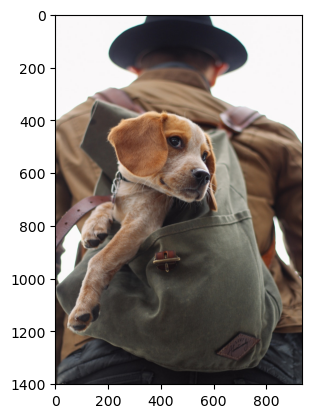

In [110]:
plt.imshow(img1)

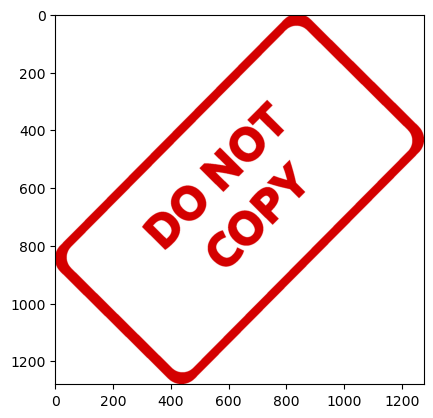

In [111]:
plt.imshow(img2)

In [112]:
# images are not the same size, we need to resize them
print('Image 1 shape: ', img1.shape)
print('Image 2 shape: ', img2.shape)

Image 1 shape:  (1401, 934, 3)
Image 2 shape:  (1280, 1277, 3)


### BLENDING IMAGES OF THE SAME SIZE

In [113]:
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

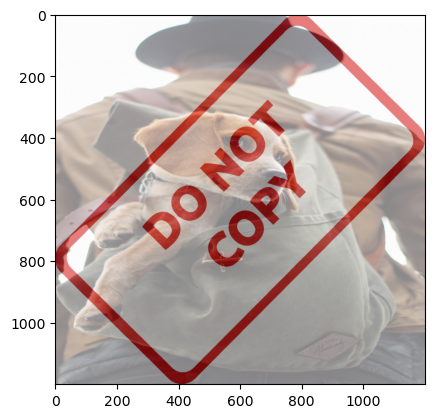

In [114]:
blended = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2,
                          beta=0.5, gamma=0)
plt.imshow(blended)

# BLENDING IMAGES OF DIFFERENT SIZES

In [115]:
# OVERLAY SMALL IMAGE ON TOP OF LARGE IMAGE (NO BLENDING)

In [116]:
img2 = cv2.resize(img2, (600,600))

In [117]:
large_img = img1
small_img = img2

In [118]:
# Both starting at 0,0
x_offset = 0 
y_offset = 0

In [119]:
# Where to start the overlay, ex(100,50)
x_end = x_offset + small_img.shape[1] # cols 
y_end = y_offset + small_img.shape[0] # rows 

In [120]:
# grab some chunk of x,y and reassign to new small image
# Numpy X --> cols   Y --> rows
large_img[y_offset:y_end,x_offset:x_end] = small_img

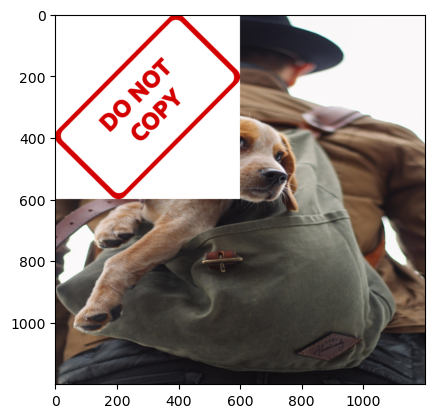

In [121]:
plt.imshow(large_img)

In [122]:
# BLEND TOGETHER IMAGES OF DIFFERENT SIZES

In [123]:
img1 = cv2.imread('../DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [124]:
img2 = cv2.resize(img2,(600,600))
img1.shape

(1401, 934, 3)

In [125]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [126]:
print(img2.shape)
rows,cols,channels = img2.shape

(600, 600, 3)


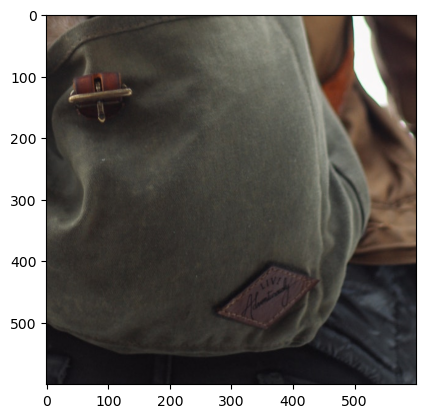

In [127]:
roi = img1[y_offset:14001, x_offset:943]
plt.imshow(roi)

## Mask

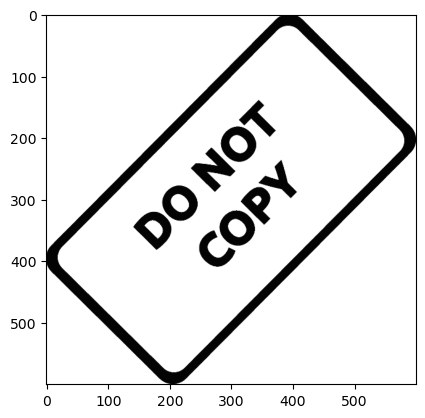

In [143]:
# map out black and ignore white
# GRAY removes color channels
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray,cmap='gray')

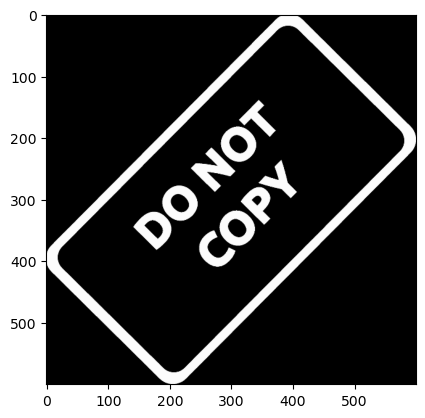

In [146]:
mask_inv = cv2.bitwise_not(img2gray) # inverse of image
plt.imshow(mask_inv, cmap='gray')

In [130]:
mask_inv.shape

(600, 600)

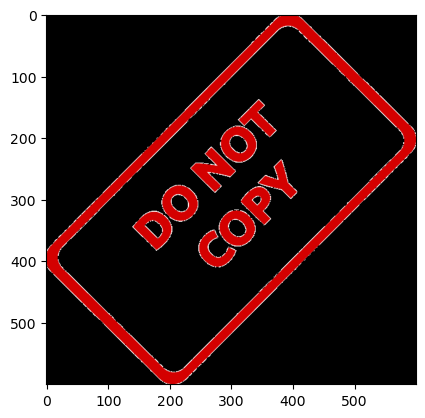

In [155]:
fig = cv2.bitwise_or(img2,img2,mask=mask_inv) # replace white with red
plt.imshow(fig)

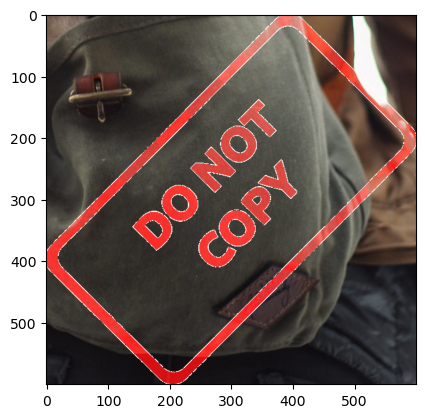

In [156]:
final_roi = cv2.bitwise_or(roi,fig) # blends both images
plt.imshow(final_roi)

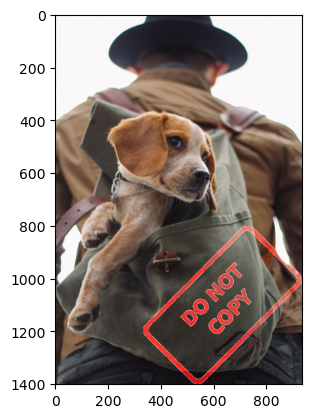

In [157]:
# add small image to large image
large_img = img1
small_img = final_roi
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img
plt.imshow(large_img)

### MASK example

In [131]:
# makes all rgb 255
# also white_background = np.ones() * 255
white_background = np.full(img2.shape,255,dtype=np.uint8)

In [132]:
white_background.shape

(600, 600, 3)

In [133]:
# puts mask on top of background
background = cv2.bitwise_or(src1=white_background,
                            src2=white_background,
                            mask=mask_inv)
background.shape

(600, 600, 3)

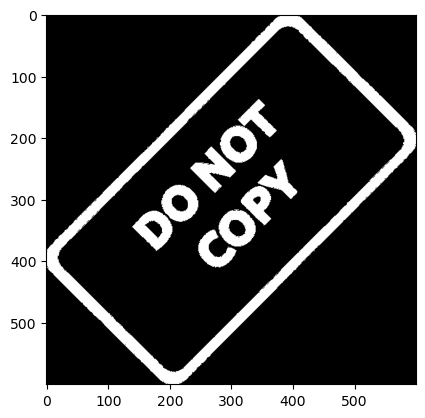

In [148]:
# same figure across all color channels
plt.imshow(background)